In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
bp = pd.read_csv('bp.csv')

In [3]:
year_list = [2014,2015,2016,2017,2018]

In [6]:
append_df = []

for j in year_list:
    bp_year = bp[bp['Expected Construct Year'] == j].reset_index(drop = True)
    construction_num_year = pd.DataFrame()
    month_list = ['Jan.%s' %j ,'Feb.%s' %j,'Mar.%s' %j ,'Apr.%s' %j,'May.%s' %j,'Jun.%s' %j,'Jul.%s' %j,
              'Aug.%s' %j,'Sep.%s' %j,'Oct.%s' %j,'Nov.%s' %j,'Dec.%s' %j]
    construction_num_year['Month'] = month_list
    category = ['MULTIFAMILY','SINGLE FAMILY / DUPLEX','COMMERCIAL','INSTITUTIONAL','INDUSTRIAL']
    
    Total_Jan = 0
    Total_Feb = 0
    Total_Mar = 0
    Total_Apr = 0
    Total_May = 0
    Total_Jun = 0
    Total_Jul = 0
    Total_Aug = 0
    Total_Sep = 0
    Total_Oct = 0
    Total_Nov = 0
    Total_Dec = 0
    
    for i in category:
        bp_cat_year = bp_year[bp_year['Category'] == i]

        Jan = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 1])
        Feb = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 2])
        Mar = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 3])
        Apr = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 4])
        May = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 5])
        Jun = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 6])
        Jul = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 7])
        Aug = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 8])
        Sep = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 9])
        Oct = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 10])
        Nov = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 11])
        Dec = len(bp_cat_year[bp_cat_year['Expected Construct Month'] == 12])
        Total_Jan += Jan
        Total_Feb += Feb
        Total_Mar += Mar
        Total_Apr += Apr
        Total_May += May
        Total_Jun += Jun
        Total_Jul += Jul
        Total_Aug += Aug
        Total_Sep += Sep
        Total_Oct += Oct
        Total_Nov += Nov
        Total_Dec += Dec

        construction_num_year['%s' % i] = [Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec]
    
    construction_num_year['TOTAL'] = [Total_Jan,Total_Feb,Total_Mar,Total_Apr,Total_May,Total_Jun,
                                      Total_Jul,Total_Aug,Total_Sep,Total_Oct,Total_Nov,Total_Dec]
    
    append_df.append(construction_num_year)

construction_num = pd.concat(append_df).reset_index(drop = True)


In [7]:
construction_num

,Month,MULTIFAMILY,SINGLE FAMILY / DUPLEX,COMMERCIAL,INSTITUTIONAL,INDUSTRIAL,TOTAL
0,Jan.2014,1,2,1,0,0,4
1,Feb.2014,3,2,5,0,0,10
2,Mar.2014,0,5,4,0,0,9
3,Apr.2014,3,16,6,0,0,25
4,May.2014,2,9,6,0,1,18
5,Jun.2014,1,5,6,0,0,12
6,Jul.2014,0,7,7,0,0,14
7,Aug.2014,1,5,9,0,0,15
8,Sep.2014,4,4,4,0,0,12
9,Oct.2014,2,5,7,0,0,14


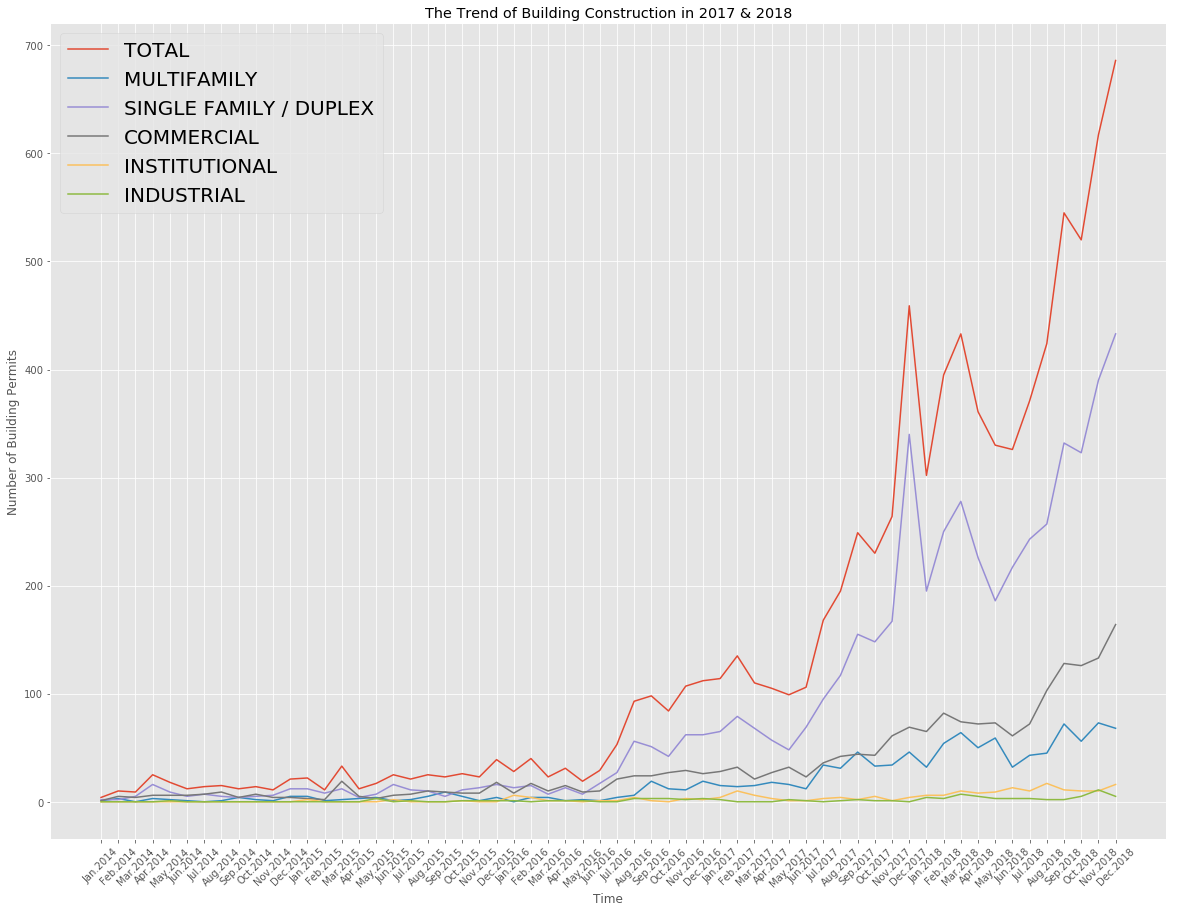

In [10]:
x = range(len(construction_num))
plt.style.use('ggplot')
plt.figure(figsize=(20,15))

plt.plot(x,construction_num['TOTAL'],label = 'TOTAL')
plt.plot(x,construction_num['MULTIFAMILY'],label = 'MULTIFAMILY')
plt.plot(x,construction_num['SINGLE FAMILY / DUPLEX'],label = 'SINGLE FAMILY / DUPLEX')
plt.plot(x,construction_num['COMMERCIAL'],label = 'COMMERCIAL')
plt.plot(x,construction_num['INSTITUTIONAL'],label = 'INSTITUTIONAL')
plt.plot(x,construction_num['INDUSTRIAL'],label = 'INDUSTRIAL')

plt.title("The Trend of Building Construction from 2014 to 2018")
plt.xlabel("Time")
plt.ylabel("Number of Building Permits")
plt.xticks(x,[i for i in construction_num['Month']],rotation=45)

plt.legend(loc=2, prop={'size': 20})
plt.grid(True)
plt.savefig('time_trend.png' , dpi=400)
plt.show()